In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jupyterthemes as jt

%matplotlib inline

In [2]:
df_happ = pd.read_csv("csv_data/happines_countries.csv", skipfooter = 1)
df_country = pd.read_csv("csv_data/country_timeline.csv")

C:\Users\emili\AppData\Local\Temp\ipykernel_20232\2359068840.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df_happ = pd.read_csv("csv_data/happines_countries.csv", skipfooter = 1)


In [3]:
df_happ.info()
df_happ.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   RANK                                        146 non-null    int64  
 1   Country                                     146 non-null    object 
 2   Happiness score                             146 non-null    float64
 3   Whisker-high                                146 non-null    float64
 4   Whisker-low                                 146 non-null    float64
 5   Dystopia (1.83) + residual                  146 non-null    float64
 6   Explained by: GDP per capita                146 non-null    float64
 7   Explained by: Social support                146 non-null    float64
 8   Explained by: Healthy life expectancy       146 non-null    float64
 9   Explained by: Freedom to make life choices  146 non-null    float64
 10  Explained by: 

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [4]:
df_happ.columns = df_happ.columns.str.replace(" ", "_")
df_happ.columns = df_happ.columns.str.replace(":", "")
df_country.columns = df_country.columns.str.replace(" ", "_")

df_happ.columns = df_happ.columns.str.lower()
df_country.columns = df_country.columns.str.lower()

In [5]:
df_happ.info()
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 12 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   rank                                       146 non-null    int64  
 1   country                                    146 non-null    object 
 2   happiness_score                            146 non-null    float64
 3   whisker-high                               146 non-null    float64
 4   whisker-low                                146 non-null    float64
 5   dystopia_(1.83)_+_residual                 146 non-null    float64
 6   explained_by_gdp_per_capita                146 non-null    float64
 7   explained_by_social_support                146 non-null    float64
 8   explained_by_healthy_life_expectancy       146 non-null    float64
 9   explained_by_freedom_to_make_life_choices  146 non-null    float64
 10  explained_by_generosity   

In [6]:
df_happ_copy = df_happ.set_index("country")
df_happ_copy.head()

,rank,happiness_score,whisker-high,whisker-low,dystopia_(1.83)_+_residual,explained_by_gdp_per_capita,explained_by_social_support,explained_by_healthy_life_expectancy,explained_by_freedom_to_make_life_choices,explained_by_generosity,explained_by_perceptions_of_corruption
country,,,,,,,,,,,
Finland,1,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
Denmark,2,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
Iceland,3,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
Switzerland,4,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
Netherlands,5,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [7]:
df_country_copy = df_country.copy()
df_country_copy = df_country_copy.dropna()
df_country_copy = df_country_copy.set_index("country_name")
df_country_copy.drop("year", axis = 1, inplace = True)
df_country_copy = df_country_copy.groupby("country_name").mean()
df_country_copy.head(15)

,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
country_name,,,,,,,,,,
Afghanistan,3.594628,7.583020,0.508245,52.170833,0.518012,0.075328,0.843283,0.473482,0.326684,0.392547
Albania,4.898745,9.405987,0.698942,68.691365,0.714779,-0.044853,0.884626,0.555175,0.300746,0.407852
Angola,4.420299,8.989725,0.737973,52.150001,0.455957,-0.088896,0.867018,0.625734,0.351173,0.397389
Argentina,6.285048,10.031485,0.903041,66.628125,0.771455,-0.152174,0.840388,0.739983,0.287840,0.381224
Armenia,4.566087,9.285748,0.721515,65.573333,0.579216,-0.197553,0.837074,0.495732,0.437056,0.349403
Australia,7.265661,10.760951,0.943814,70.541071,0.920036,0.269638,0.419941,0.737657,0.213367,0.495785
Austria,7.230613,10.882274,0.924841,70.366072,0.898243,0.130572,0.565233,0.715953,0.184031,0.457858
Azerbaijan,4.940989,9.513446,0.770649,62.289285,0.662107,-0.170534,0.698330,0.517863,0.230727,0.763238
Bangladesh,4.763065,8.127265,0.609250,62.299644,0.751853,-0.028315,0.739329,0.484708,0.270175,0.768274


In [8]:
df_comb = pd.concat([df_happ_copy["happiness_score"], df_country_copy], axis = 1)
df_comb = df_comb.dropna()
df_comb.info()
df_comb.head()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, Finland to Afghanistan
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   happiness_score                    117 non-null    float64
 1   life_ladder                        117 non-null    float64
 2   log_gdp_per_capita                 117 non-null    float64
 3   social_support                     117 non-null    float64
 4   healthy_life_expectancy_at_birth   117 non-null    float64
 5   freedom_to_make_life_choices       117 non-null    float64
 6   generosity                         117 non-null    float64
 7   perceptions_of_corruption          117 non-null    float64
 8   positive_affect                    117 non-null    float64
 9   negative_affect                    117 non-null    float64
 10  confidence_in_national_government  117 non-null    float64
dtypes: float64(11)
memory usage: 11.0+ KB


,happiness_score,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,confidence_in_national_government
Finland,7.821,7.611299,10.753935,0.950494,70.325358,0.941380,-0.001996,0.244848,0.738809,0.185581,0.596645
Denmark,7.636,7.658959,10.887545,0.955379,70.147000,0.942618,0.165917,0.196148,0.784120,0.200526,0.571994
Iceland,7.557,7.450597,10.869086,0.977333,71.793750,0.926976,0.255014,0.696571,0.813747,0.160404,0.416761
Switzerland,7.512,7.528177,11.127461,0.942772,71.978181,0.923328,0.094757,0.304179,0.756787,0.189489,0.770718
Netherlands,7.415,7.455590,10.891656,0.931476,71.126786,0.904320,0.273811,0.402404,0.735410,0.210668,0.615837


In [9]:
df_comb["log_gdp_per_capita"].describe()

count    117.000000
mean       9.448247
std        1.081155
min        7.018452
25%        8.536025
50%        9.524672
75%       10.355035
max       11.345471
Name: log_gdp_per_capita, dtype: float64

In [10]:
df_comb["log_gdp_per_capita"].quantile(0.25)

8.536025110933334

In [11]:
df_comb.shape

(117, 11)

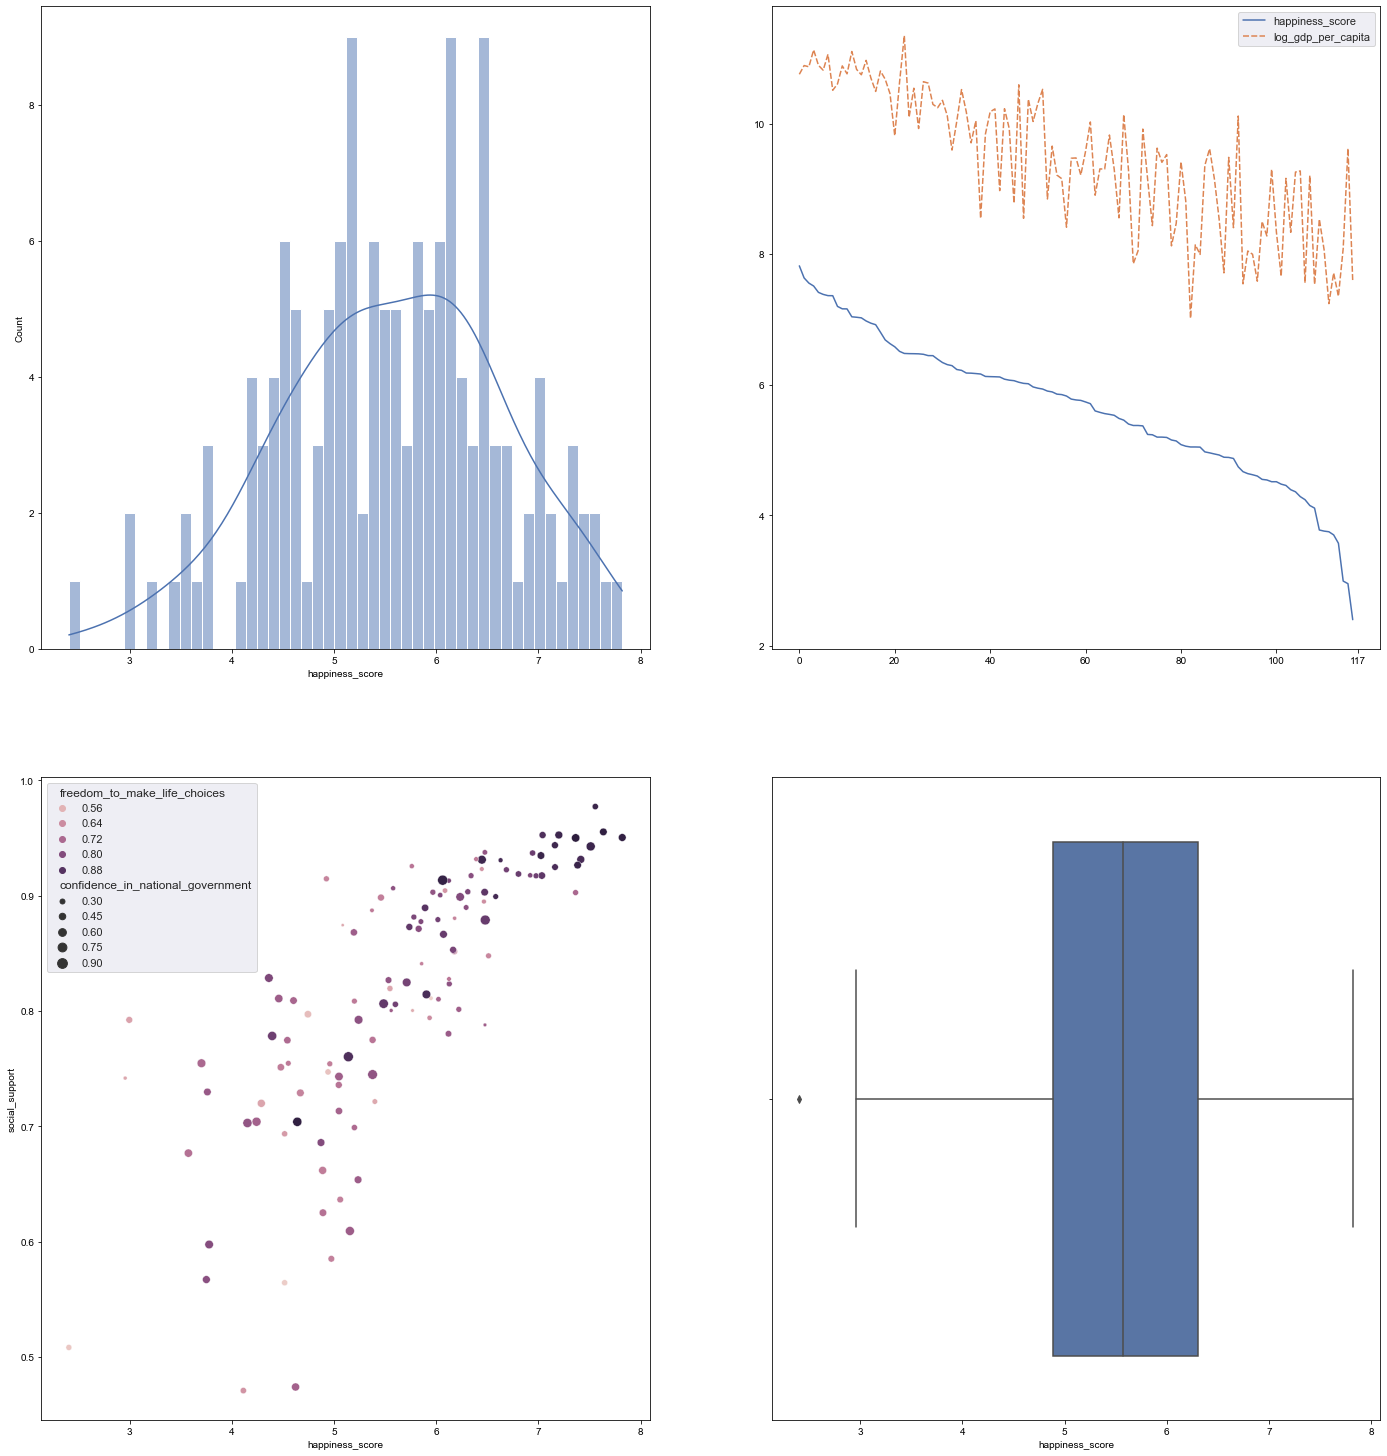

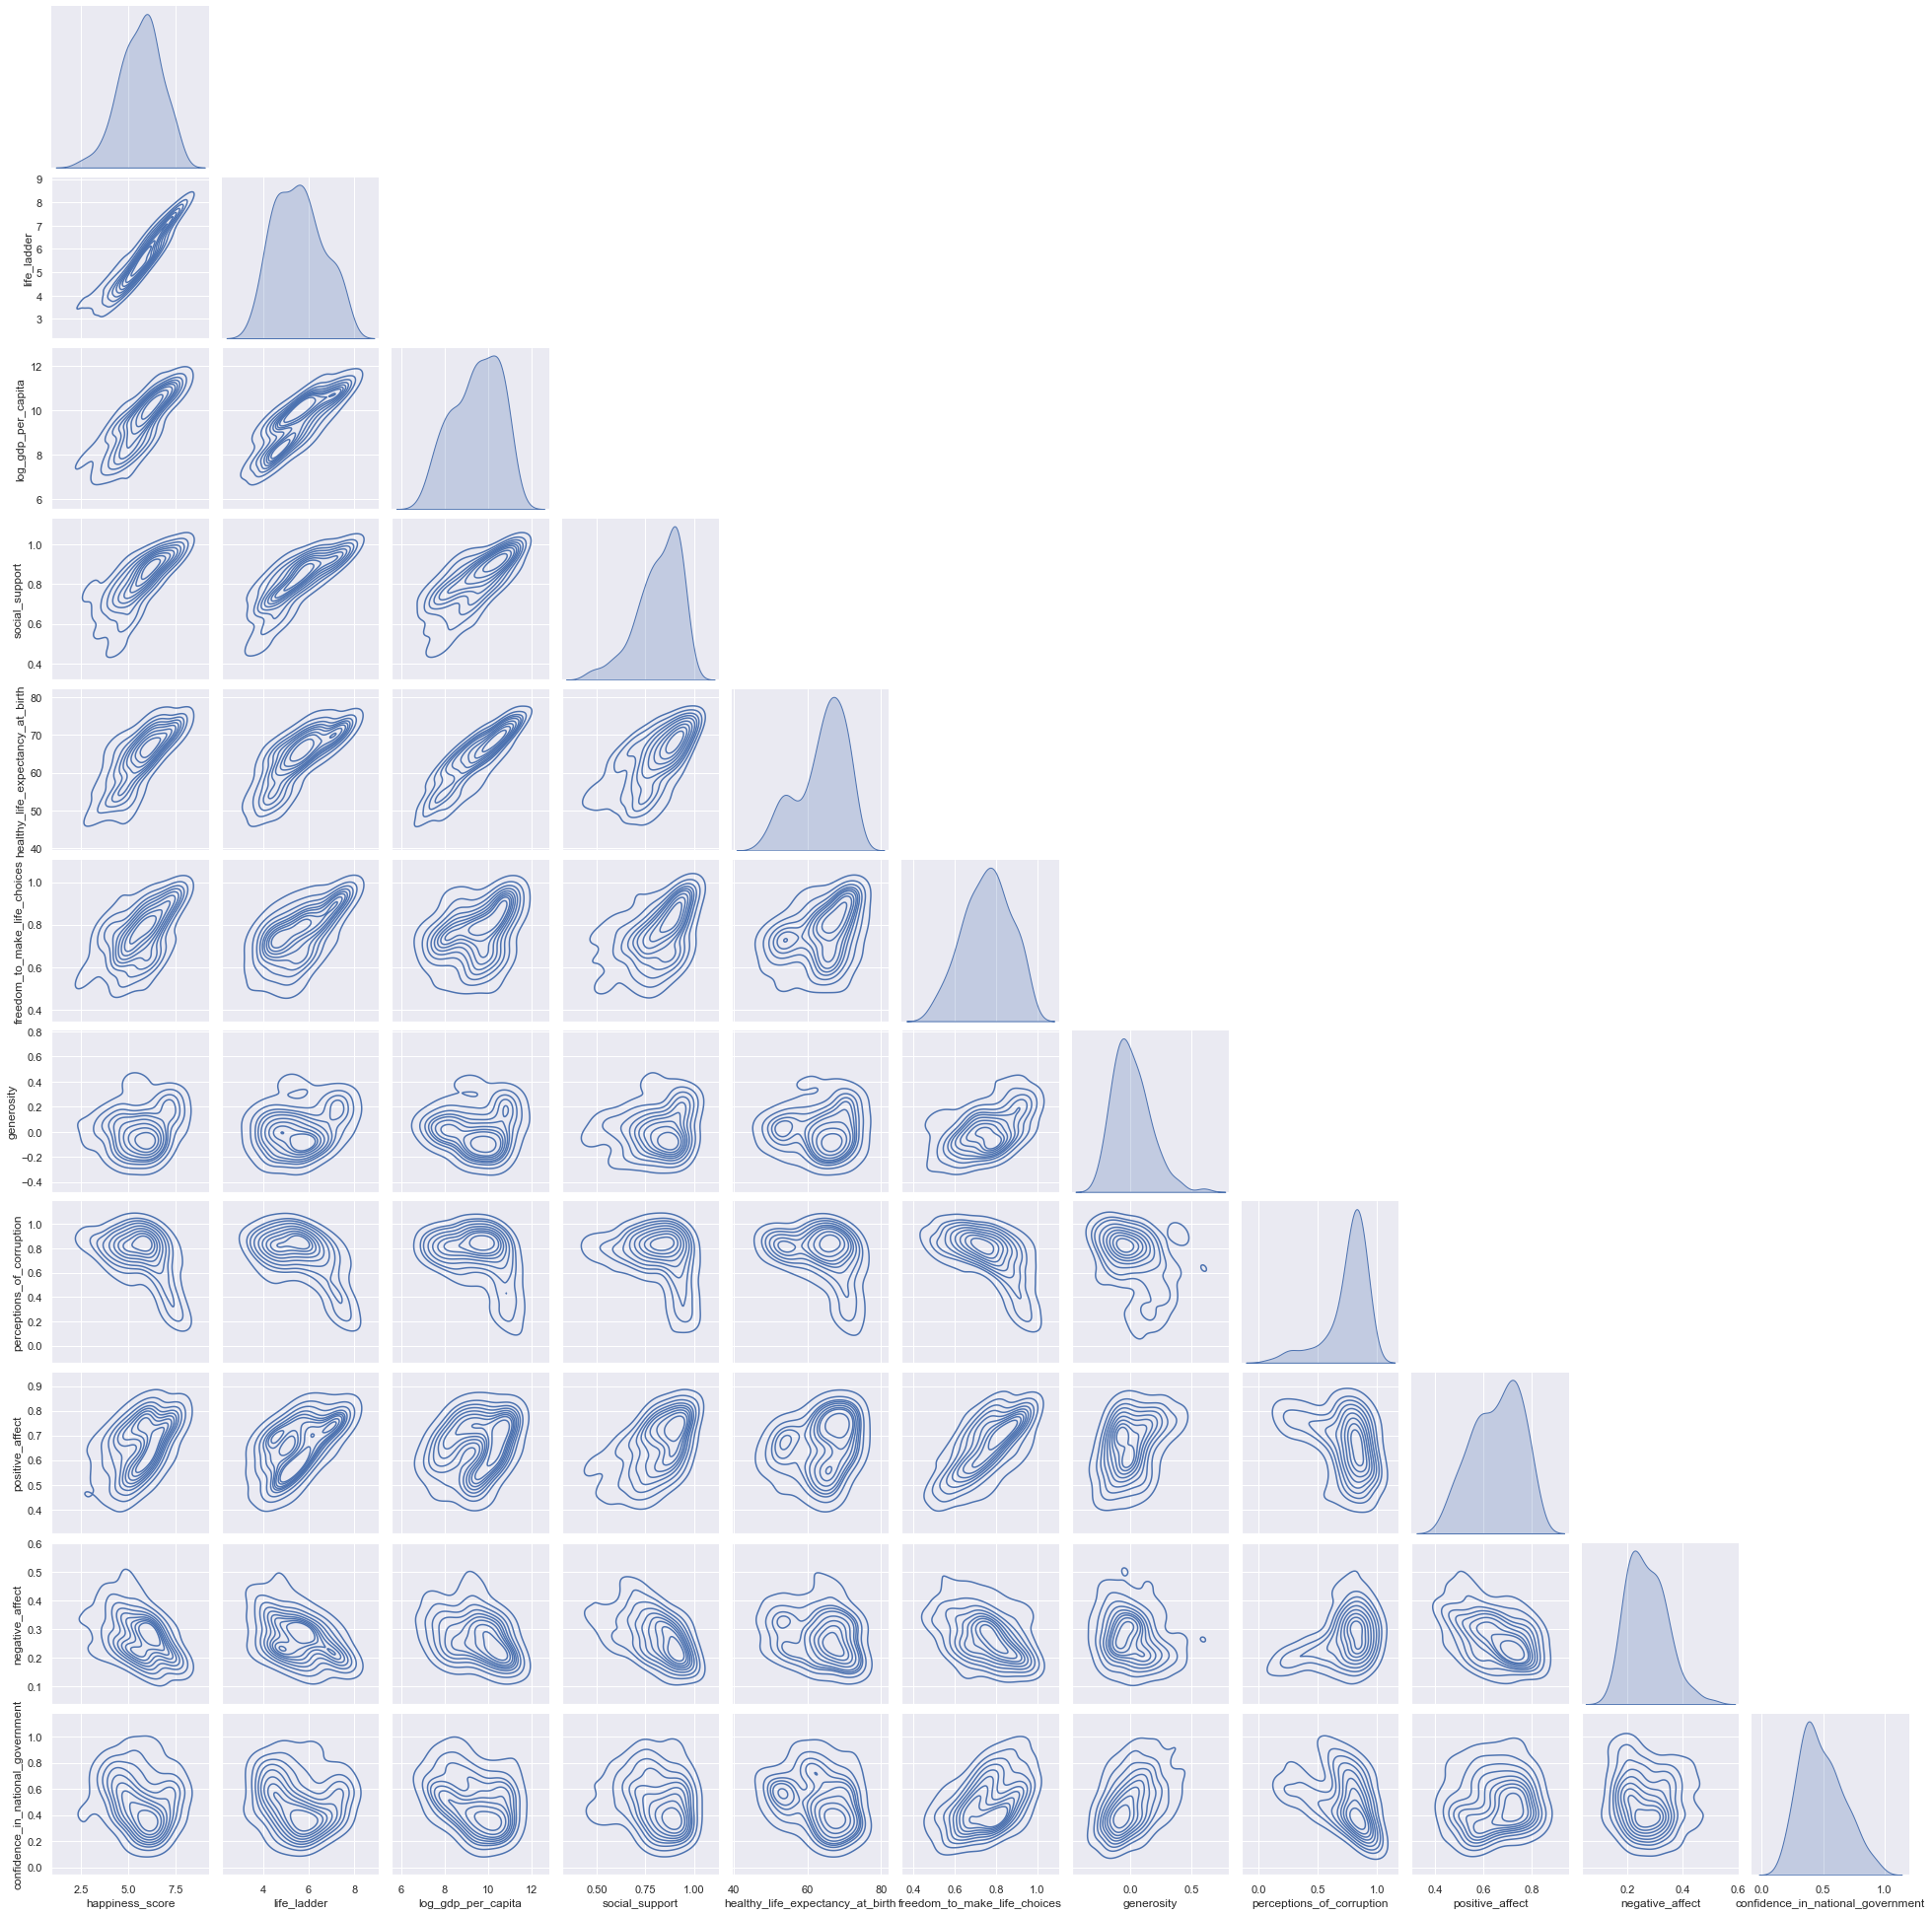

In [12]:
plot_obj = plt.subplots(nrows=2, ncols = 2, figsize = (24,26))
fig, ((ax1,ax2),(ax3,ax4)) = plot_obj

sns.set_theme(style="darkgrid")

sns.histplot(data = df_happ["happiness_score"], ax = ax1, bins = 50, kde = True)

sns.lineplot(data = df_comb[["happiness_score", "log_gdp_per_capita"]], ax = ax2)
bars = (0, 20, 40, 60, 80, 100, 117)
ax2.set_xticks(bars, minor=False)
ax2.set_xticklabels(bars, minor=False)

sns.scatterplot(data = df_comb, ax = ax3, x = "happiness_score", y = "social_support",
                hue = "freedom_to_make_life_choices", size = "confidence_in_national_government",
               sizes = (10,100))

sns.boxplot(data = df_happ["happiness_score"], x = df_happ["happiness_score"], ax = ax4)

pairplt_obj = sns.pairplot(data = df_comb, corner = True, kind = "kde")

In [13]:
fig.savefig("Happiness_of_countries_correlations")
pairplt_obj.savefig("pairplot_everything")